In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df_train = pd.read_csv('data/Train.csv')
df_train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.000000,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0

In [4]:
df_test = pd.read_csv('data/Test.csv')
df_test.shape

(16136, 77)

In [5]:
place_id_train = set(df_train['Place_ID'].unique())
place_id_test = set(df_test['Place_ID'].unique())

# Find the intersection of "Place_ID" values between the two DataFrames
intersection = place_id_train.intersection(place_id_test)

# Print the common "Place_ID" values
print("Common Place_ID values:", intersection)

Common Place_ID values: set()


In [6]:
df_train.columns = df_train.columns.str.lower()

In [7]:
df_test.columns = df_test.columns.str.lower()

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   place_id x date                                      30557 non-null  object 
 1   date                                                 30557 non-null  object 
 2   place_id                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [9]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [10]:
df_test['date'] = pd.to_datetime(df_test['date'])

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_1806/1145112096.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


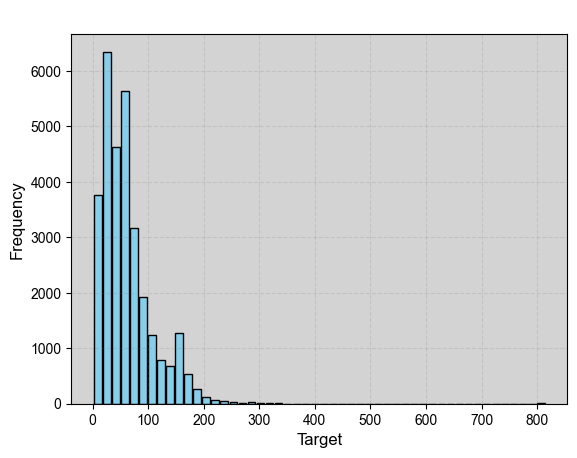

In [11]:
plt.hist(df_train['target'], bins=50, edgecolor='black', color='skyblue', rwidth=0.85)
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title(' ', fontsize=16)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#plt.savefig('figures/price_psqft_dist.png') 
plt.show()

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_1806/2441951723.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


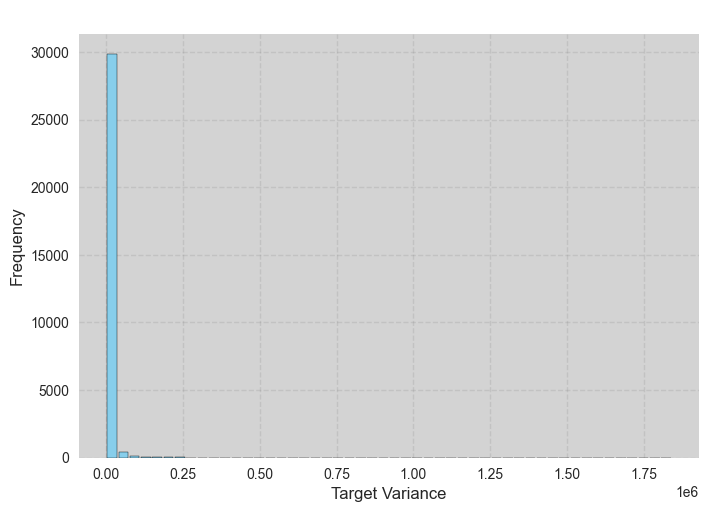

In [12]:
plt.hist(df_train['target_variance'], bins=50, edgecolor='black', color='skyblue', rwidth=0.85)
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title(' ', fontsize=16)
plt.xlabel('Target Variance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#plt.savefig('figures/price_psqft_dist.png') 
plt.show()

In [13]:
df_corr = df_train.copy()
df_corr = df_corr.drop(['place_id x date', 'date', 'place_id'], axis=1)

In [14]:
correlation = df_corr.corr()['target']
corr_data = pd.DataFrame(correlation)
print(corr_data.sort_values(by='target', ascending=False).head(20))
print('------------------------------')
print(corr_data.sort_values(by='target', ascending=False).tail(20))


                                                   target
target                                           1.000000
target_min                                       0.818803
target_max                                       0.630801
l3_co_co_column_number_density                   0.375737
l3_hcho_tropospheric_hcho_column_number_density  0.347125
l3_hcho_hcho_slant_column_number_density         0.320849
l3_no2_no2_slant_column_number_density           0.315718
l3_no2_no2_column_number_density                 0.306772
l3_no2_tropospheric_no2_column_number_density    0.295380
target_variance                                  0.184818
l3_so2_absorbing_aerosol_index                   0.152000
l3_cloud_cloud_top_pressure                      0.123855
l3_cloud_cloud_base_pressure                     0.097343
target_count                                     0.094135
l3_ch4_aerosol_optical_depth                     0.086445
l3_ch4_ch4_column_volume_mixing_ratio_dry_air    0.075086
l3_ch4_aerosol

In [15]:
df_train.groupby(['place_id']).size().reset_index(name='Count')

,place_id,Count
0,010Q650,94
1,05EC30X,90
2,0DPWHX8,94
3,0GBXTHY,94
4,0HYPV1N,94
5,0I2XREH,65
6,0KV6RJ1,94
7,0MGEY68,94
8,0O9R6AD,92
9,0PP73FZ,94


In [16]:
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day

df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day

In [17]:
df_train['log_target'] = np.log(df_train['target'])


In [18]:
df_train['log_target_min'] = np.log(df_train['target_min'])
df_train['log_target_max'] = np.log(df_train['target_max'])

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_4178/94072448.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


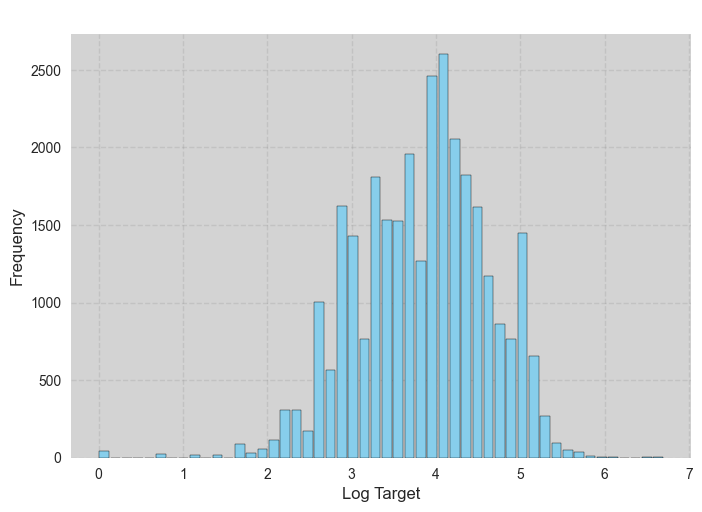

In [19]:
plt.hist(df_train['log_target'], bins=50, edgecolor='black', color='skyblue', rwidth=0.85)
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title(' ', fontsize=16)
plt.xlabel('Log Target', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#plt.savefig('figures/price_psqft_dist.png') 
plt.show()

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_1806/170671060.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


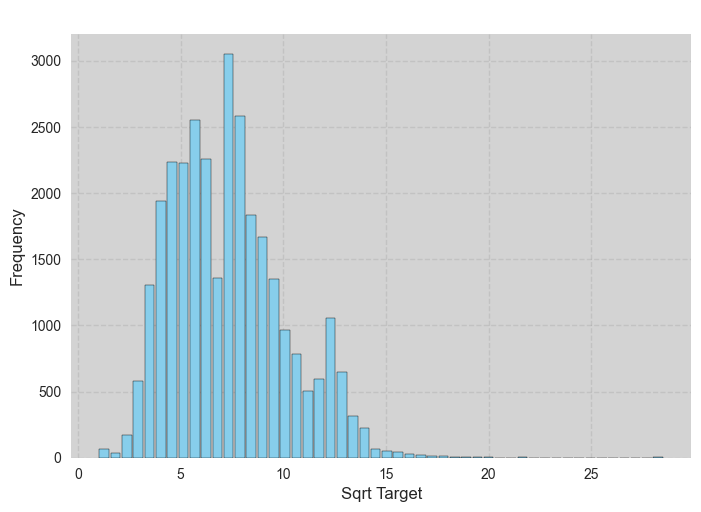

In [19]:
df_train['sqrt_target'] = np.sqrt(df_train['target'])

plt.hist(df_train['sqrt_target'], bins=50, edgecolor='black', color='skyblue', rwidth=0.85)
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title(' ', fontsize=16)
plt.xlabel('Sqrt Target', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#plt.savefig('figures/price_psqft_dist.png') 
plt.show()

In [20]:
#sns.histplot(x='target_max', y='target_min', data=df_train ,hue='target')
df_train['target'].unique()

array([ 38. ,  39. ,  24. ,  49. ,  21. ,  28. ,  18. ,  31. ,  25. ,
        29. ,  23. ,  40. ,  52. ,  60. ,  46. ,  53. ,  54. ,  34. ,
        45. ,  27. ,  15. ,  41. ,  42. ,  47. ,  22. ,  13. ,  50. ,
        57. ,  51. ,  16. ,  48. ,  44. ,  30. ,  36. ,  59. ,  32. ,
        20. ,  33. ,  43. ,  19. ,  58. ,  61. ,  72. ,  80. ,  17. ,
        55. ,  65. ,  70. ,  76. ,  73. , 117. , 128. , 119. , 101. ,
       115. ,  67. , 124. ,  75. , 131. , 157. , 138. , 161. , 152. ,
        66. ,  62. ,  83. ,  96. ,  81. ,  90. ,  95. ,  84. ,  78. ,
       130. ,  56. ,  93. ,  89. , 139. , 126. , 114. ,  88. , 112. ,
        91. ,  68. , 107. ,  98. ,  77. , 123. , 120. ,  82. ,  64. ,
        92. ,   8. ,  11. ,  10. ,  12. ,  37. ,  14. ,   9. ,  26. ,
         7. ,  87. ,  85. , 104. , 129. , 142. , 151. , 137. , 127. ,
        74. ,  97. , 149. , 109. ,  63. , 147. , 134. , 159. , 162. ,
        69. ,   5. ,   3. ,   2. ,  71. , 102. , 122. ,  99. , 132. ,
       158. , 164. ,

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_4178/3242716794.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


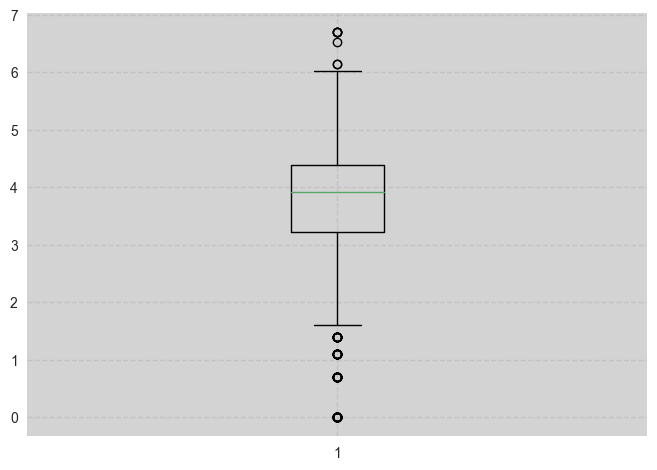

In [22]:
plt.boxplot(df_train['log_target'])
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')

plt.show()

In [21]:
#Null values percentages in columns 

null_count = df_train.isnull().sum()
total_rows = len(df_train)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                     place_id x date         0.000000
1                                                date         0.000000
2                                            place_id         0.000000
3                                              target         0.000000
4                                          target_min         0.000000
5                                          target_max         0.000000
6                                     target_variance         0.000000
7                                        target_count         0.000000
8                precipitable_water_entire_atmosphere         0.000000
9                   relative_humidity_2m_above_ground         0.000000
10                  specific_humidity_2m_above_ground         0.000000
11                        temperature_2m_above_ground         0.000000
12               u_component_of_wind_10m_above_ground         0.000000
13    

In [22]:
df_drop_train = df_train.drop(['place_id x date'], axis=1)

df_drop_test = df_test.drop(['place_id x date'], axis=1)

In [23]:
# Get the features list with null values 
columns_with_nan_train = df_train.columns[df_train.isnull().any()].tolist()

print(columns_with_nan_train)

['l3_no2_no2_column_number_density', 'l3_no2_no2_slant_column_number_density', 'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction', 'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle', 'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle', 'l3_no2_solar_zenith_angle', 'l3_no2_stratospheric_no2_column_number_density', 'l3_no2_tropopause_pressure', 'l3_no2_tropospheric_no2_column_number_density', 'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature', 'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle', 'l3_o3_sensor_zenith_angle', 'l3_o3_solar_azimuth_angle', 'l3_o3_solar_zenith_angle', 'l3_co_co_column_number_density', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_sensor_azimuth_angle', 'l3_co_sensor_zenith_angle', 'l3_co_solar_azimuth_angle', 'l3_co_solar_zenith_angle', 'l3_hcho_hcho_slant_column_number_density', 'l3_hcho_cloud_fraction', 'l3_hcho_sensor_azimuth_angle', 'l3_hcho_sensor_zenith_angle', 'l3_hcho_solar

In [24]:
# Inputing with place_id and month average

averages = df_drop_train.groupby(['place_id', 'month']).mean()

# Iterate over the columns with missing values
for col in columns_with_nan_train:
    # Fill missing values with the calculated averages
    df_drop_train[col] = df_drop_train.apply(lambda row: averages.loc[(row['place_id'], row['month']), col] if pd.isna(row[col]) else row[col], axis=1)

In [25]:
#Null values percentages in columns after inputing with place_id and month average

null_count = df_drop_train.isnull().sum()
total_rows = len(df_drop_train)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                                date         0.000000
1                                            place_id         0.000000
2                                              target         0.000000
3                                          target_min         0.000000
4                                          target_max         0.000000
5                                     target_variance         0.000000
6                                        target_count         0.000000
7                precipitable_water_entire_atmosphere         0.000000
8                   relative_humidity_2m_above_ground         0.000000
9                   specific_humidity_2m_above_ground         0.000000
10                        temperature_2m_above_ground         0.000000
11               u_component_of_wind_10m_above_ground         0.000000
12               v_component_of_wind_10m_above_ground         0.000000
13    

In [26]:
# Get the features list with null values 

columns_with_nan_train_2 = df_drop_train.columns[df_drop_train.isnull().any()].tolist()

print(columns_with_nan_train_2)

['l3_no2_no2_column_number_density', 'l3_no2_no2_slant_column_number_density', 'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction', 'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle', 'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle', 'l3_no2_solar_zenith_angle', 'l3_no2_stratospheric_no2_column_number_density', 'l3_no2_tropopause_pressure', 'l3_no2_tropospheric_no2_column_number_density', 'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature', 'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle', 'l3_o3_sensor_zenith_angle', 'l3_o3_solar_azimuth_angle', 'l3_o3_solar_zenith_angle', 'l3_co_co_column_number_density', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_sensor_azimuth_angle', 'l3_co_sensor_zenith_angle', 'l3_co_solar_azimuth_angle', 'l3_co_solar_zenith_angle', 'l3_hcho_hcho_slant_column_number_density', 'l3_hcho_cloud_fraction', 'l3_hcho_sensor_azimuth_angle', 'l3_hcho_sensor_zenith_angle', 'l3_hcho_solar

In [27]:
# Inputing with place_id average
averages = df_drop_train.groupby(['place_id']).mean()

# Iterate over the columns with missing values
for col in columns_with_nan_train_2:
    # Fill missing values with the calculated averages
    df_drop_train[col] = df_drop_train.apply(lambda row: averages.loc[(row['place_id']), col] if pd.isna(row[col]) else row[col], axis=1)

In [28]:
#Null values percentages in columns after inputing with place_id average
null_count = df_drop_train.isnull().sum()
total_rows = len(df_drop_train)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                                date         0.000000
1                                            place_id         0.000000
2                                              target         0.000000
3                                          target_min         0.000000
4                                          target_max         0.000000
5                                     target_variance         0.000000
6                                        target_count         0.000000
7                precipitable_water_entire_atmosphere         0.000000
8                   relative_humidity_2m_above_ground         0.000000
9                   specific_humidity_2m_above_ground         0.000000
10                        temperature_2m_above_ground         0.000000
11               u_component_of_wind_10m_above_ground         0.000000
12               v_component_of_wind_10m_above_ground         0.000000
13    

In [29]:
# Remain null data was 0.0091% thats dropped (3 rows)
df_drop_train = df_drop_train.dropna()

In [30]:
#Null values percentages in columns after inputing with place_id average
null_count = df_drop_train.isnull().sum()
total_rows = len(df_drop_train)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                                date              0.0
1                                            place_id              0.0
2                                              target              0.0
3                                          target_min              0.0
4                                          target_max              0.0
5                                     target_variance              0.0
6                                        target_count              0.0
7                precipitable_water_entire_atmosphere              0.0
8                   relative_humidity_2m_above_ground              0.0
9                   specific_humidity_2m_above_ground              0.0
10                        temperature_2m_above_ground              0.0
11               u_component_of_wind_10m_above_ground              0.0
12               v_component_of_wind_10m_above_ground              0.0
13    

In [31]:
# Get the features list with null values 

columns_with_nan_test = df_test.columns[df_test.isnull().any()].tolist()

print(columns_with_nan_test)


['l3_no2_no2_column_number_density', 'l3_no2_no2_slant_column_number_density', 'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction', 'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle', 'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle', 'l3_no2_solar_zenith_angle', 'l3_no2_stratospheric_no2_column_number_density', 'l3_no2_tropopause_pressure', 'l3_no2_tropospheric_no2_column_number_density', 'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature', 'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle', 'l3_o3_sensor_zenith_angle', 'l3_o3_solar_azimuth_angle', 'l3_o3_solar_zenith_angle', 'l3_co_co_column_number_density', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_sensor_azimuth_angle', 'l3_co_sensor_zenith_angle', 'l3_co_solar_azimuth_angle', 'l3_co_solar_zenith_angle', 'l3_hcho_hcho_slant_column_number_density', 'l3_hcho_cloud_fraction', 'l3_hcho_sensor_azimuth_angle', 'l3_hcho_sensor_zenith_angle', 'l3_hcho_solar

In [32]:
# Inputing with place_id and month average

averages = df_drop_test.groupby(['place_id', 'month']).mean()

# Iterate over the columns with missing values
for col in columns_with_nan_test:
    # Fill missing values with the calculated averages
    df_drop_test[col] = df_drop_test.apply(lambda row: averages.loc[(row['place_id'], row['month']), col] if pd.isna(row[col]) else row[col], axis=1)

In [33]:
#Null values percentages in columns after inputing with place_id and month average
null_count = df_drop_test.isnull().sum()
total_rows = len(df_drop_test)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                                date         0.000000
1                                            place_id         0.000000
2                precipitable_water_entire_atmosphere         0.000000
3                   relative_humidity_2m_above_ground         0.000000
4                   specific_humidity_2m_above_ground         0.000000
5                         temperature_2m_above_ground         0.000000
6                u_component_of_wind_10m_above_ground         0.000000
7                v_component_of_wind_10m_above_ground         0.000000
8                    l3_no2_no2_column_number_density         0.185920
9              l3_no2_no2_slant_column_number_density         0.185920
10                     l3_no2_absorbing_aerosol_index         0.185920
11                              l3_no2_cloud_fraction         0.185920
12                             l3_no2_sensor_altitude         0.185920
13    

In [34]:
# Get the features list with null values 
columns_with_nan_test_2 = df_test.columns[df_test.isnull().any()].tolist()

print(columns_with_nan_test_2)

['l3_no2_no2_column_number_density', 'l3_no2_no2_slant_column_number_density', 'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction', 'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle', 'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle', 'l3_no2_solar_zenith_angle', 'l3_no2_stratospheric_no2_column_number_density', 'l3_no2_tropopause_pressure', 'l3_no2_tropospheric_no2_column_number_density', 'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature', 'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle', 'l3_o3_sensor_zenith_angle', 'l3_o3_solar_azimuth_angle', 'l3_o3_solar_zenith_angle', 'l3_co_co_column_number_density', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_sensor_azimuth_angle', 'l3_co_sensor_zenith_angle', 'l3_co_solar_azimuth_angle', 'l3_co_solar_zenith_angle', 'l3_hcho_hcho_slant_column_number_density', 'l3_hcho_cloud_fraction', 'l3_hcho_sensor_azimuth_angle', 'l3_hcho_sensor_zenith_angle', 'l3_hcho_solar

In [35]:
# Inputing with place_id average

averages = df_drop_test.groupby(['place_id']).mean()

# Iterate over the columns with missing values
for col in columns_with_nan_test_2:
    # Fill missing values with the calculated averages
    df_drop_test[col] = df_drop_test.apply(lambda row: averages.loc[(row['place_id']), col] if pd.isna(row[col]) else row[col], axis=1)

In [36]:
#Null values percentages in columns after inputing with place_id average

null_count = df_drop_test.isnull().sum()
total_rows = len(df_drop_test)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                                date              0.0
1                                            place_id              0.0
2                precipitable_water_entire_atmosphere              0.0
3                   relative_humidity_2m_above_ground              0.0
4                   specific_humidity_2m_above_ground              0.0
5                         temperature_2m_above_ground              0.0
6                u_component_of_wind_10m_above_ground              0.0
7                v_component_of_wind_10m_above_ground              0.0
8                    l3_no2_no2_column_number_density              0.0
9              l3_no2_no2_slant_column_number_density              0.0
10                     l3_no2_absorbing_aerosol_index              0.0
11                              l3_no2_cloud_fraction              0.0
12                             l3_no2_sensor_altitude              0.0
13    

In [37]:
df_drop_train.columns

Index(['date', 'place_id', 'target', 'target_min', 'target_max',
       'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'l3_no2_no2_column_number_density',
       'l3_no2_no2_slant_column_number_density',
       'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction',
       'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle',
       'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle',
       'l3_no2_solar_zenith_angle',
       'l3_no2_stratospheric_no2_column_number_density',
       'l3_no2_tropopause_pressure',
       'l3_no2_tropospheric_no2_column_number_density',
       'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature',
       'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle',
       'l3_o3_sensor_z

## Define Feature and Target, Train,Test Split

In [38]:
# Define target and features 

y = df_drop_train['log_target']
X= df_drop_train.drop(['date', 'place_id', 'target', 'target_min', 'target_max','target_variance', 'target_count','log_target', 'log_target_min', 'log_target_max','sqrt_target','year'],axis=1)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21387, 76), (9167, 76), (21387,), (9167,))

In [41]:
# Create dummy variables for specific columns in the training set
X_train = pd.get_dummies(X_train, columns=['month','day'])

# Create dummy variables for the same columns in the testing set
X_test = pd.get_dummies(X_test, columns=['month','day'])


In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21387, 109), (9167, 109), (21387,), (9167,))

## Linear Regression

In [46]:
lin_reg = LinearRegression()

In [47]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = lin_reg.predict(X_test)

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_4178/2932131208.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


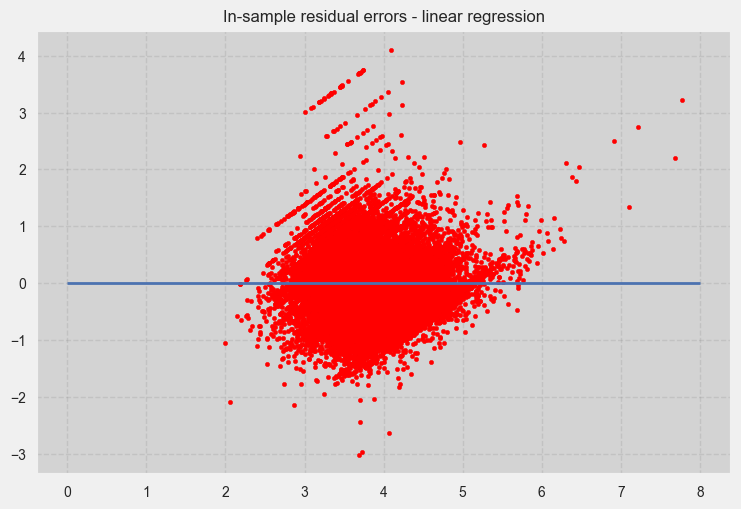

In [49]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in training data
plt.scatter(lin_reg.predict(X_train),
            lin_reg.predict(X_train) - y_train,
            color="red", s=10)
 
# plotting residual errors in test data
#plt.scatter(y_pred,
            #y_pred - y_test,
            #color="blue", s=10,
            #label='Test data',alpha=0.5)
 
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
 
# plotting legend
plt.legend(loc='upper right')
 
# plot title
plt.title("In-sample residual errors - linear regression")
 
# method call for showing the plot
plt.show()

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_4178/2579762598.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


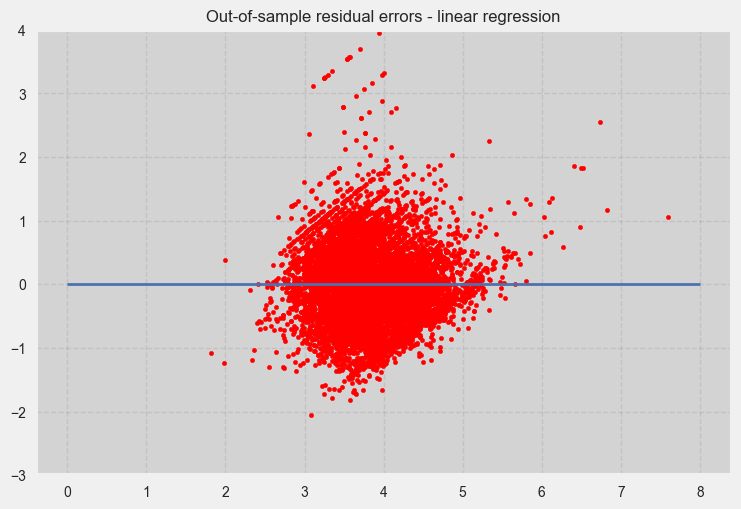

In [50]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in test data
plt.scatter(lin_reg.predict(X_test),
            lin_reg.predict(X_test) - y_test,
            color="red", s=10)


plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
plt.ylim(-3, 4)
plt.legend(loc='upper right')
plt.title("Out-of-sample residual errors - linear regression")
plt.show()

In [51]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.3f}")
r_2 = r2_score(y_test, y_pred)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2 = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2:.3f}")

MSE: 0.366
RMSE: 0.605
R^2: 0.400
Adjusted R^2: 0.393


## Lasso Regression

In [73]:
lasso = Lasso(alpha=0.5, max_iter=int(10e5))
lasso.fit(X_train,y_train)

Lasso(alpha=0.5, max_iter=1000000)

In [74]:
y_pred_lasso = lasso.predict(X_test)

In [75]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"MSE: {mse_lasso:.3f}")
rmse_lasso = np.sqrt(mse_lasso)
print(f"RMSE: {rmse_lasso:.3f}")
r_2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_lasso = 1 - (1 - r_2_lasso) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_lasso:.3f}")

MSE: 0.488
RMSE: 0.699
R^2: 0.400
Adjusted R^2: 0.190


In [76]:
coefficients_1 = lasso.coef_
# Create a list of selected variables based on non-zero coefficients
selected_variables_1 = [var for coef, var in zip(coefficients_1, X_train.columns) if coef != 0]

# Print the selected variables in Model 1
print("Selected Variables in Model 1:", selected_variables_1)

#Print number of features Lasso uses
def coeff_info(model, total_features):
    coeff_used = np.sum(model.coef_ != 0)
    print('The model is using', coeff_used, 'out of', total_features, 'features.')
    print("The highest coefficient has a value of:", max(model.coef_.round(3)))
    
coeff_info(lasso, total_features=X_train.shape[1])

Selected Variables in Model 1: ['relative_humidity_2m_above_ground', 'temperature_2m_above_ground', 'l3_no2_sensor_altitude', 'l3_no2_tropopause_pressure', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_solar_azimuth_angle', 'l3_cloud_cloud_base_height', 'l3_cloud_cloud_base_pressure', 'l3_cloud_cloud_optical_depth', 'l3_cloud_cloud_top_height', 'l3_cloud_cloud_top_pressure', 'l3_cloud_solar_azimuth_angle', 'l3_aer_ai_sensor_altitude', 'l3_aer_ai_sensor_azimuth_angle', 'l3_so2_sensor_azimuth_angle', 'l3_so2_solar_azimuth_angle', 'l3_ch4_ch4_column_volume_mixing_ratio_dry_air', 'l3_ch4_aerosol_height']
The model is using 20 out of 109 features.
The highest coefficient has a value of: 0.001


## Ridge Regression

In [69]:
alpha = 1.0  # Regularization strength (hyperparameter); you can adjust this value

ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train, y_train)

Ridge()

In [70]:
y_pred_ridge = ridge_model.predict(X_test)

In [72]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"MSE: {mse_ridge:.3f}")
rmse_ridge = np.sqrt(mse_ridge)
print(f"RMSE: {rmse_ridge:.3f}")
r_2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_ridge = 1 - (1 - r_2_ridge) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_ridge:.3f}")

MSE: 0.397
RMSE: 0.630
R^2: 0.400
Adjusted R^2: 0.342


## Random Forest Regressor

In [52]:
random_regr = RandomForestRegressor(n_estimators=1000, max_depth=4,min_samples_leaf=20 ,max_samples=0.2 ,random_state=42, n_jobs=-1)

random_regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, max_samples=0.2, min_samples_leaf=20,
                      n_estimators=1000, n_jobs=-1, random_state=42)

In [53]:
y_pred_randfor = random_regr.predict(X_test)

In [54]:
mse_randfor = mean_squared_error(y_test, y_pred_randfor)
print(f"MSE: {mse_randfor:.3f}")
rmse_randfor = np.sqrt(mse_randfor)
print(f"RMSE: {rmse_randfor:.3f}")
r_2_randfor = r2_score(y_test, y_pred_randfor)
print(f"R^2: {r_2_randfor:.3f}")

p = X_train.shape[1]
n = len(y_test)  
adjusted_r2_randfor = 1 - (1 - r_2_randfor) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_randfor:.3f}")

MSE: 0.384
RMSE: 0.619
R^2: 0.371
Adjusted R^2: 0.363


## Extra Tree Regressor

In [55]:
extra_tree = ExtraTreesRegressor(n_estimators=500, random_state=0)
extra_tree.fit(X_train, y_train)
extra_tree.score(X_test, y_test)

0.6531516727563997

In [56]:
y_pred_extree = extra_tree.predict(X_test)

                                            Feature  Importance
53                        l3_aer_ai_sensor_altitude    0.086632
25                   l3_co_co_column_number_density    0.066897
39  l3_hcho_tropospheric_hcho_column_number_density    0.042344
7            l3_no2_no2_slant_column_number_density    0.038755
4              u_component_of_wind_10m_above_ground    0.036960
33         l3_hcho_hcho_slant_column_number_density    0.034098
17    l3_no2_tropospheric_no2_column_number_density    0.030316
5              v_component_of_wind_10m_above_ground    0.028515
6                  l3_no2_no2_column_number_density    0.025506
3                       temperature_2m_above_ground    0.021881


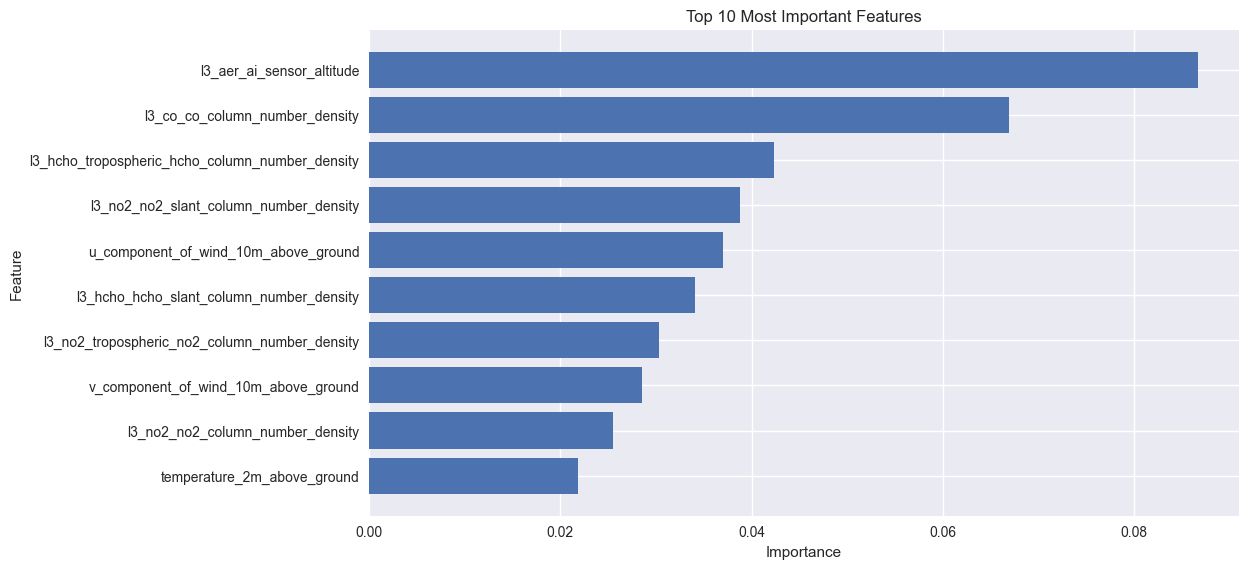

In [57]:
# Get feature importances from the trained model
feature_importances = extra_tree.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df.head(10)
print(top_10_features)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  
plt.show()

Based on the feature names and their corresponding importance scores in the table you provided, it appears that you are working with a machine learning model for environmental or atmospheric data. Here's an interpretation of the top 10 features:

l3_aer_ai_sensor_altitude: This feature might represent the altitude information related to a sensor measuring aerosol concentration or properties in the atmosphere.
l3_co_co_column_number_density: This feature could represent the column number density of carbon monoxide (CO) in the atmosphere.
place_id_J3C3IAI: This seems to be a categorical feature related to a specific place or location, possibly encoded as a label or identifier.
l3_hcho_tropospheric_hcho_column_number_density: This feature could represent the tropospheric column number density of formaldehyde (HCHO) in the atmosphere.
l3_no2_no2_slant_column_number_density: This feature may represent the slant column number density of nitrogen dioxide (NO2) in the atmosphere.
u_component_of_wind_10m_above_ground: This feature likely represents the east-west component of wind velocity at a height of 10 meters above the ground.
l3_hcho_hcho_slant_column_number_density: This feature may represent the slant column number density of formaldehyde (HCHO) in the atmosphere, similar to feature #4 but possibly using a different measurement method or altitude.
v_component_of_wind_10m_above_ground: This feature likely represents the north-south component of wind velocity at a height of 10 meters above the ground.
l3_no2_tropospheric_no2_column_number_density: This feature could represent the tropospheric column number density of nitrogen dioxide (NO2) in the atmosphere, similar to feature #5 but possibly considering the troposphere.
l3_no2_no2_column_number_density: This feature may represent the column number density of nitrogen dioxide (NO2) in the atmosphere, similar to feature #5 but possibly considering the entire column of the atmosphere.


If a specific area or location consistently emerges as an important predictor for PM2.5 levels across all 340 locations, it suggests that this location might have certain characteristics or features that are strongly correlated with PM2.5 levels in those areas. This can be due to several factors:

Significant Pollution Source: The specific area you mentioned might be near a major pollution source or point of emissions, which could have a substantial impact on PM2.5 levels in surrounding areas.
Geographic Factors: Certain geographic features, such as topography, wind patterns, or proximity to bodies of water, might make this location more representative of the broader region's air quality.
Meteorological Patterns: This location could be in an area where meteorological conditions, like prevailing wind direction, tend to influence PM2.5 levels in a consistent way across multiple locations.
Data Quality: It's also possible that the data from this particular location is of high quality and provides reliable measurements, making it more influential in the model.
Statistical Artefact: In some cases, an apparent predictor's importance may be a statistical artifact. Feature importance scores can be influenced by various factors, including the scale of the data and the algorithm used. It's important to interpret these scores in the context of the specific model and data.

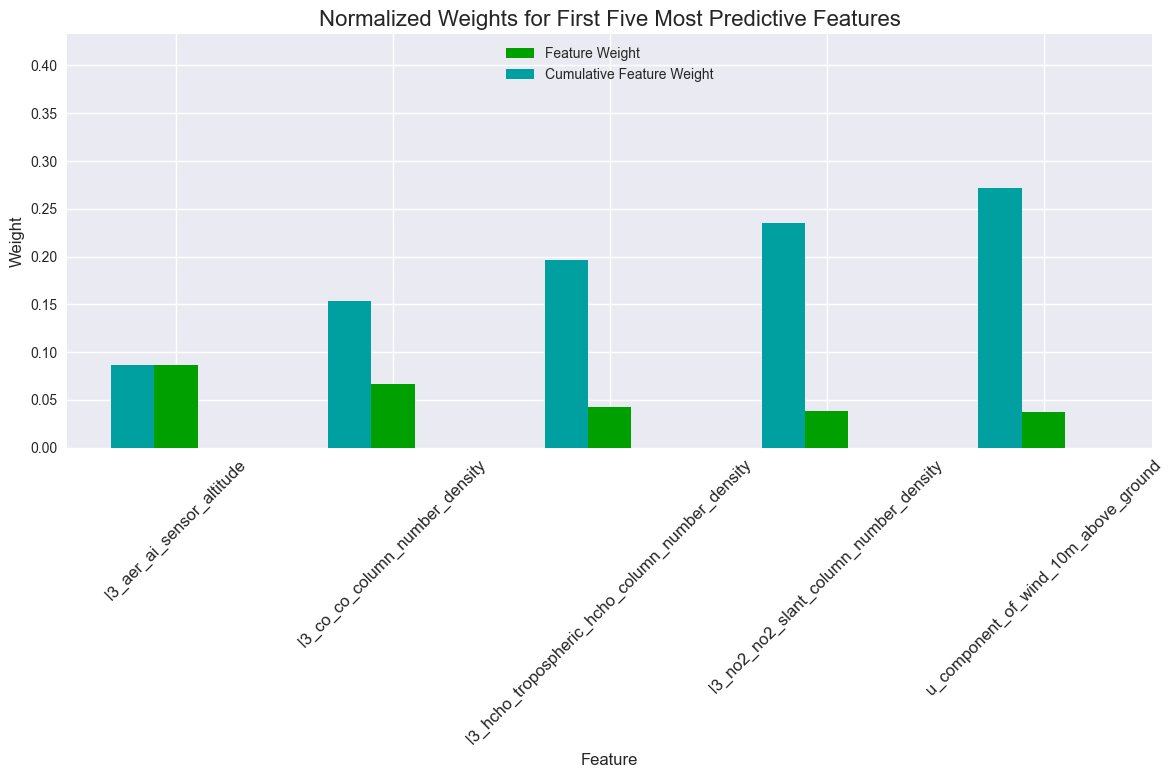

In [58]:
def feature_plot(importances, X_train, y_train):
      
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:10]]
    values = importances[indices][:10]

    # Creat the plot
    fig = plt.figure(figsize = (12,8))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(10), values, width = 0.2, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(10) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(10), columns, rotation=45, fontsize=12)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    

    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

imp_features = extra_tree.feature_importances_


# Plot
feature_plot(imp_features, X_train, y_train)

In [59]:
X_train['l3_no2_sensor_altitude'].nunique()

18575

In [60]:
mse_extree = mean_squared_error(y_test, y_pred_extree)
print(f"MSE: {mse_extree:.3f}")
rmse_extree = np.sqrt(mse_extree)
print(f"RMSE: {rmse_extree:.3f}")
r_2_extree = r2_score(y_test, y_pred_extree)
print(f"R^2: {r_2_extree:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_extree = 1 - (1 - r_2_extree) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_extree:.3f}")

MSE: 0.212
RMSE: 0.460
R^2: 0.653
Adjusted R^2: 0.649


/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_4178/370418293.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


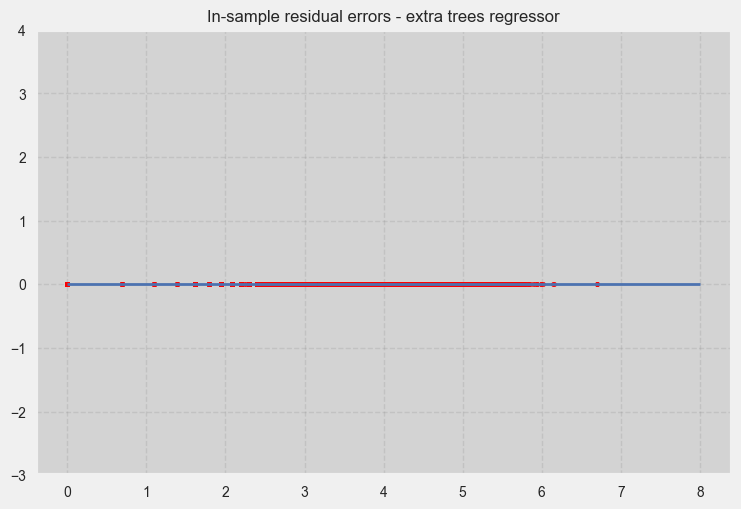

In [61]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in test data
plt.scatter(extra_tree.predict(X_train),
            extra_tree.predict(X_train) - y_train,
            color="red", s=10)


plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
plt.ylim(-3, 4)
plt.legend(loc='upper right')
plt.title("In-sample residual errors - extra trees regressor")
plt.show()

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_4178/977627286.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


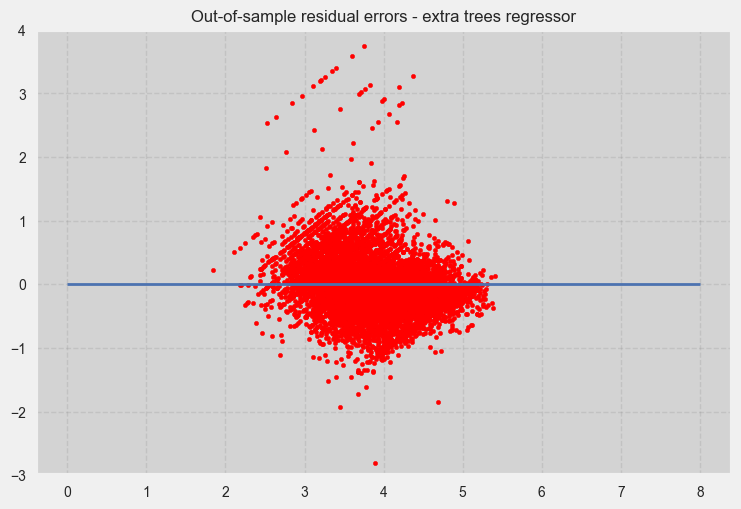

In [62]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in test data
plt.scatter(extra_tree.predict(X_test),
            extra_tree.predict(X_test) - y_test,
            color="red", s=10)


plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
plt.ylim(-3, 4)
plt.legend(loc='upper right')
plt.title("Out-of-sample residual errors - extra trees regressor")
plt.show()

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21387, 109), (9167, 109), (21387,), (9167,))

In [100]:
# Imposing restriction that scores should be similar in test and train samples
# Define the hyperparameters you want to tune
param_grid = {
    'max_depth': [5, 10, 15],           
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 5]      
}

best_model = None
best_train_test_diff_etr = float('inf')

for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            current_model = ExtraTreesRegressor(n_estimators=500, random_state=0,
                                                max_depth=max_depth,
                                                min_samples_split=min_samples_split,
                                                min_samples_leaf=min_samples_leaf)
            current_model.fit(X_train, y_train)

            
            y_train_pred_etr = current_model.predict(X_train)
            y_test_pred_etr = current_model.predict(X_test)

            
            train_rmse_etr = np.sqrt(mean_squared_error(y_train, y_train_pred_etr))
            train_r2_etr = r2_score(y_train, y_train_pred_etr)
            test_rmse_etr = np.sqrt(mean_squared_error(y_test, y_test_pred_etr))
            test_r2_etr = r2_score(y_test, y_test_pred_etr)

            
            train_test_diff_etr = abs(train_rmse_etr - test_rmse_etr) + abs(train_r2_etr - test_r2_etr)

            
            if train_test_diff_etr < best_train_test_diff_etr:
                best_train_test_diff_etr = train_test_diff_etr
                best_model = current_model


y_pred_etr = best_model.predict(X_test)


rmse_etr = np.sqrt(mean_squared_error(y_test, y_pred_etr))
r2_etr = r2_score(y_test, y_pred_etr)
print("Root Mean Squared Error (RMSE):", rmse_etr)
print("R-squared (R2):", r2_etr)


Root Mean Squared Error (RMSE): 0.6118108321738224
R-squared (R2): 0.38632558456250154


In [101]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print("max_depth:", best_model.max_depth)
print("min_samples_split:", best_model.min_samples_split)
print("min_samples_leaf:", best_model.min_samples_leaf)


Best Hyperparameters:
max_depth: 5
min_samples_split: 2
min_samples_leaf: 5


## KNN Regression

In [64]:
knn = KNeighborsRegressor(n_neighbors=21)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [65]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"MSE: {mse_knn:.3f}")
rmse_knn = np.sqrt(mse_knn)
print(f"RMSE: {rmse_knn:.3f}")
r_2_knn = r2_score(y_test, y_pred_knn)
print(f"R^2: {r_2_knn:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_knn = 1 - (1 - r_2_knn) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_knn:.3f}")

MSE: 0.470
RMSE: 0.685
R^2: 0.230
Adjusted R^2: 0.221


## Stacking Regressor

In [66]:
# We take the best models from our gridsearch exercise
rf_regressor = RandomForestRegressor(n_estimators=500, max_depth=30, min_samples_split=2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=20, p=1, weights='distance')
gb_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42)
et_regressor = ExtraTreesRegressor(n_estimators=500, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# A list of tuples with the regressor name and the model
base_regressors = [
    ('RandomForest', rf_regressor),
    ('KNeighbors', knn_regressor),
    ('GradientBoosting', gb_regressor),
    ('ExtraTrees', et_regressor)
]

# StackingRegressor with a linear regression as the final estimator
final_estimator = LinearRegression()

stacking_regressor = StackingRegressor(estimators=base_regressors, final_estimator=final_estimator, n_jobs=-1)

# Train the stacking regressor on the training data
stacking_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_stacking = stacking_regressor.predict(X_test)

# Evaluate the stacking regressor
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
print(f"Mean Squared Error: {mse_stacking}")

rmse_stacking = np.sqrt(mse_stacking)
print(f"RMSE: {rmse_stacking:.3f}")
r_2_stacking = r2_score(y_test, y_pred_stacking)
print(f"R^2: {r_2_stacking:.3f}")

p = X_train.shape[1]
n = len(y_test)  
adjusted_r2_stacking = 1 - (1 - r_2_stacking) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_stacking:.3f}")

Mean Squared Error: 0.1711467836072077
RMSE: 0.414
R^2: 0.719
Adjusted R^2: 0.716


In [67]:
r_2_stacking_train = r2_score(y_train, stacking_regressor.predict(X_train))
print(f"R^2_train: {r_2_stacking_train:.3f}")

R^2_train: 0.981


In [43]:
# We take only 2 models
gb_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42)
et_regressor = ExtraTreesRegressor(n_estimators=500, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# A list of tuples with the regressor name and the model
base_regressors_two = [
    ('GradientBoosting', gb_regressor),
    ('ExtraTrees', et_regressor)
]

# StackingRegressor with a linear regression as the final estimator
final_estimator_two = LinearRegression()

stacking_regressor_two = StackingRegressor(estimators=base_regressors_two, final_estimator=final_estimator_two, n_jobs=-1)

# Train the stacking regressor on the training data
stacking_regressor_two.fit(X_train, y_train)

# Make predictions on the test data
y_pred_stacking_two = stacking_regressor_two.predict(X_test)

# Evaluate the stacking regressor
mse_stacking_two = mean_squared_error(y_test, y_pred_stacking_two)
print(f"Mean Squared Error: {mse_stacking_two}")

rmse_stacking_two = np.sqrt(mse_stacking_two)
print(f"RMSE: {rmse_stacking_two:.3f}")
r_2_stacking_two = r2_score(y_test, y_pred_stacking_two)
print(f"R^2: {r_2_stacking_two:.3f}")

p = X_train.shape[1]
n = len(y_test)  
adjusted_r2_stacking_two = 1 - (1 - r_2_stacking_two) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_stacking_two:.3f}")

Mean Squared Error: 0.17379513321712797
RMSE: 0.417
R^2: 0.715
Adjusted R^2: 0.712


In [81]:
# Assuming stacking_regressor is your StackingRegressor instance
final_estimator = stacking_regressor.final_estimator_

if isinstance(final_estimator, LinearRegression):
    # Access the coefficients (weights) of the Linear Regression model
    coefficients = final_estimator.coef_
    
    # Create a list of base model names
    base_model_names = [model[0] for model in stacking_regressor.named_estimators_.items()]
    
    # Create a dictionary mapping base model names to their coefficients
    model_coefficients = dict(zip(base_model_names, coefficients))
    
    # Display the coefficients (weights) along with base model names
    print("Final Linear Regression Model Coefficients (Weights):")
    for model_name, coefficient in model_coefficients.items():
        print(f"Base Model: {model_name}, Coefficient (Weight): {coefficient:.4f}")
else:
    print("Final estimator is not a Linear Regression model.")

Final Linear Regression Model Coefficients (Weights):
Base Model: RandomForest, Coefficient (Weight): -0.3268
Base Model: KNeighbors, Coefficient (Weight): -0.0684
Base Model: GradientBoosting, Coefficient (Weight): 0.6488
Base Model: ExtraTrees, Coefficient (Weight): 0.8433


/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_4178/4053095486.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


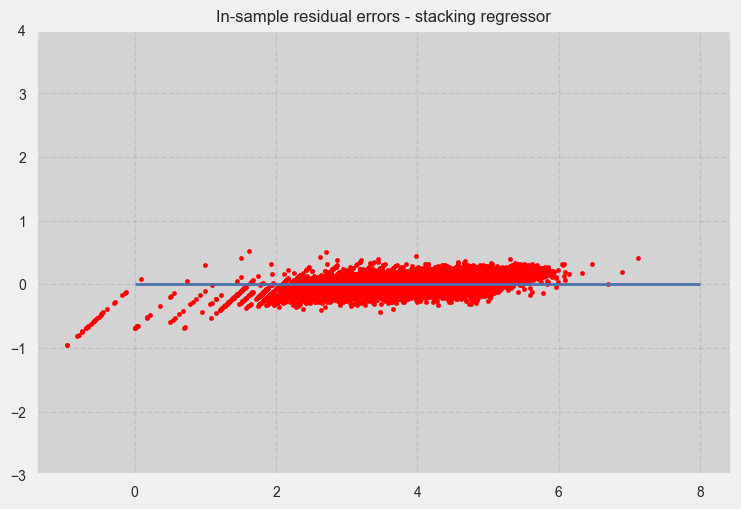

In [78]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in training data
plt.scatter(stacking_regressor.predict(X_train),
            stacking_regressor.predict(X_train) - y_train,
            color="red", s=10)
 
plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
plt.ylim(-3, 4) 
plt.legend(loc='upper right')
plt.title("In-sample residual errors - stacking regressor")
plt.show()

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_4178/2590827530.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


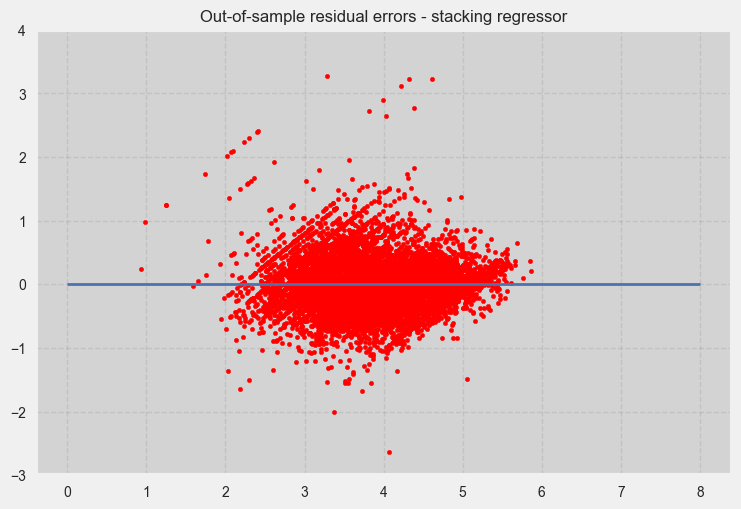

In [80]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in training data
plt.scatter(stacking_regressor.predict(X_test),
            stacking_regressor.predict(X_test) - y_test,
            color="red", s=10)
 
plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
plt.ylim(-3, 4) 
plt.legend(loc='upper right')
plt.title("Out-of-sample residual errors - stacking regressor")
plt.show()

## let's use low performing ExtraTreesRegressor 

Hyperparameters:
max_depth: 5
min_samples_split: 2
min_samples_leaf: 5

In [93]:
# We substitute ExtraTreesRegression with the one with lower performance
rf_regressor = RandomForestRegressor(n_estimators=500, max_depth=30, min_samples_split=2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=20, p=1, weights='distance')
gb_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42)
et_regressor = ExtraTreesRegressor(n_estimators=500, max_depth=5, min_samples_leaf=5, min_samples_split=2, random_state=42)

base_regressors_lp = [
    ('RandomForest', rf_regressor),
    ('KNeighbors', knn_regressor),
    ('GradientBoosting', gb_regressor),
    ('ExtraTrees', et_regressor)
]

final_estimator_lp = LinearRegression()

stacking_regressor_lp = StackingRegressor(estimators=base_regressors_lp, final_estimator=final_estimator_lp, n_jobs=-1)

stacking_regressor_lp.fit(X_train, y_train)

y_pred_stacking_lp = stacking_regressor_lp.predict(X_test)
y_pred_stacking_lp_train = stacking_regressor_lp.predict(X_train)


mse_stacking_lp = mean_squared_error(y_test, y_pred_stacking_lp)
rmse_stacking_lp = np.sqrt(mse_stacking_lp)
r_2_stacking_lp = r2_score(y_test, y_pred_stacking_lp)


mse_stacking_lp_train = mean_squared_error(y_train, y_pred_stacking_lp_train)
rmse_stacking_lp_train = np.sqrt(mse_stacking_lp_train)
r_2_stacking_lp_train = r2_score(y_train, y_pred_stacking_lp_train)


p_test = X_test.shape[1]
n_test = len(y_test)
adjusted_r2_stacking_lp = 1 - (1 - r_2_stacking_lp) * (n_test - 1) / (n_test - p_test - 1)

p_train = X_train.shape[1]
n_train = len(y_train)
adjusted_r2_stacking_lp_train = 1 - (1 - r_2_stacking_lp_train) * (n_train - 1) / (n_train - p_train - 1)


print("Test RMSE:", rmse_stacking_lp)
print("Test R^2:", r_2_stacking_lp)
print("Adjusted R^2 (Test):", adjusted_r2_stacking_lp)

print("Train RMSE:", rmse_stacking_lp_train)
print("Train R^2:", r_2_stacking_lp_train)
print("Adjusted R^2 (Train):", adjusted_r2_stacking_lp_train)


Test RMSE: 0.36985661683549065
Test R^2: 0.77573036346764
Adjusted R^2 (Test): 0.7642056104088539
Train RMSE: 0.17896836638712357
Train R^2: 0.9476360350671081
Adjusted R^2 (Train): 0.9465156292838464


/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_1744/398039852.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


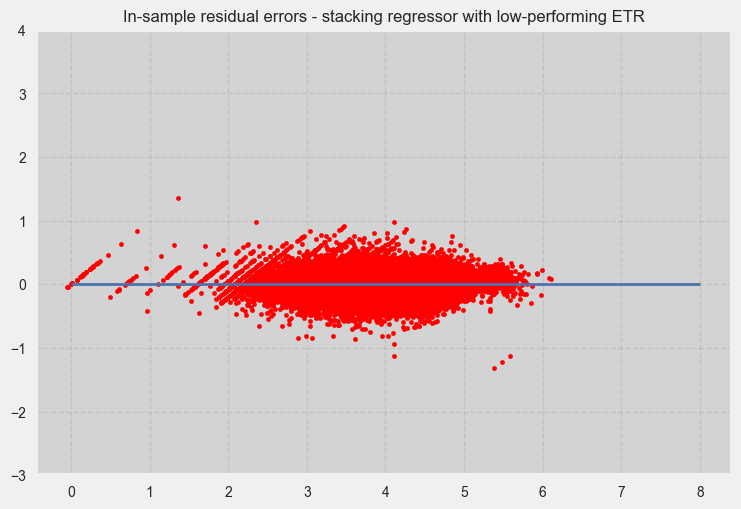

In [94]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in training data
plt.scatter(stacking_regressor_lp.predict(X_train),
            stacking_regressor_lp.predict(X_train) - y_train,
            color="red", s=10)
 
plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
plt.ylim(-3, 4) 
plt.legend(loc='upper right')
plt.title("In-sample residual errors - stacking regressor with low-performing ETR")
plt.show()

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_1744/4041160094.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


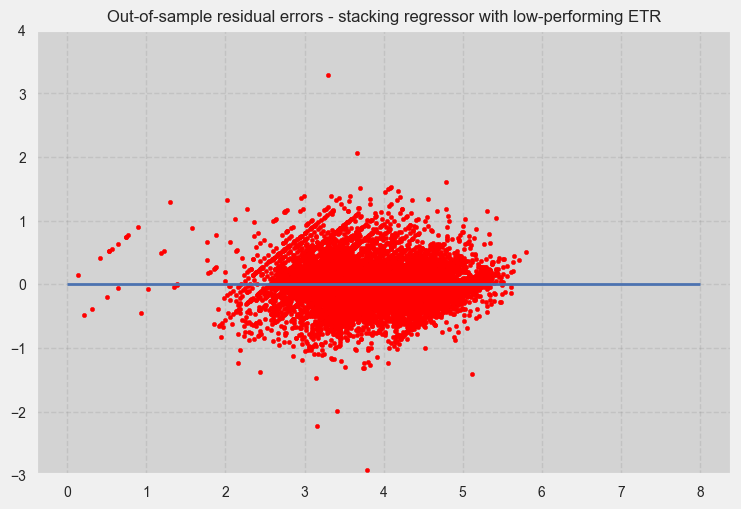

In [96]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in training data
plt.scatter(stacking_regressor_lp.predict(X_test),
            stacking_regressor_lp.predict(X_test) - y_test,
            color="red", s=10)
 
plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
plt.ylim(-3, 4) 
plt.legend(loc='upper right')
plt.title("Out-of-sample residual errors - stacking regressor with low-performing ETR")
plt.show()

## Stacking regressor with cross validation

In [133]:
# We do cross-validation for our stacking regressor. Combine train and test data and run cross-validation exercise
X_cv = np.vstack((X_train, X_test))
y_cv = np.concatenate((y_train, y_test))

# Perform cross-validation
cv_scores = cross_val_score(stacking_regressor, X_cv, y_cv, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive RMSE scores
rmse_scores = np.sqrt(-cv_scores)

# Print the cross-validation results
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())

# it took 200 minutes

Cross-Validation RMSE Scores: [0.42057229 0.40701837 0.40377826 0.40472736 0.41431493]
Mean RMSE: 0.41008224315454456
Standard Deviation of RMSE: 0.006414966954296279


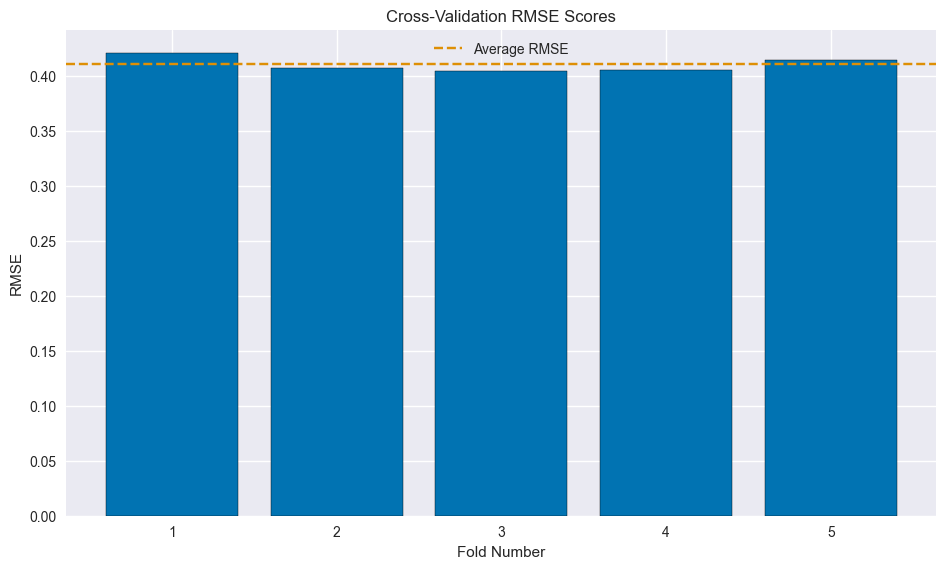

In [134]:

fold_numbers = list(range(1, len(rmse_scores) + 1))

# Use a color-blind-friendly palette from Seaborn
palette = sns.color_palette("colorblind")

# Create a bar plot for RMSE scores with color-blind-friendly colors
plt.figure(figsize=(10, 6))
plt.bar(fold_numbers, rmse_scores, color=palette[0], edgecolor='black')
plt.axhline(y=rmse_scores.mean(), color=palette[1], linestyle='--', label='Average RMSE')

# Adding labels and title
plt.xlabel('Fold Number')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.legend()

# Display the plot
plt.show()

## Stacking Regressor with ridge regressor as aggregator of base models

In [82]:
# Ridge regressor as an aggregator

rf_regressor = RandomForestRegressor(n_estimators=500, max_depth=30, min_samples_split=2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=20, p=1, weights='distance')
gb_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42)
et_regressor = ExtraTreesRegressor(n_estimators=500, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# A list of tuples with the regressor name and the model
base_regressors_ridge = [
    ('RandomForest', rf_regressor),
    ('KNeighbors', knn_regressor),
    ('GradientBoosting', gb_regressor),
    ('ExtraTrees', et_regressor)
]

# Create the stacking regressor with Ridge Regression as the final estimator
final_estimator_ridge = Ridge(alpha=0.5)  # You can adjust the alpha parameter as needed

stacking_regressor_ridge = StackingRegressor(estimators=base_regressors_ridge, final_estimator=final_estimator_ridge, n_jobs=-1)

# Train the stacking regressor on the training data
stacking_regressor_ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred_stacking_ridge = stacking_regressor_ridge.predict(X_test)

# Evaluate the stacking regressor
mse_stacking_ridge = mean_squared_error(y_test, y_pred_stacking_ridge)
print(f"Mean Squared Error: {mse_stacking_ridge}")

rmse_stacking_ridge = np.sqrt(mse_stacking_ridge)
print(f"RMSE: {rmse_stacking_ridge:.3f}")
r_2_stacking_ridge = r2_score(y_test, y_pred_stacking_ridge)
print(f"R^2: {r_2_stacking_ridge:.3f}")

p = X_test.shape[1]
n = len(y_test)  
adjusted_r2_stacking_ridge = 1 - (1 - r_2_stacking_ridge) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_stacking_ridge:.3f}")


Mean Squared Error: 0.12117750467952589
RMSE: 0.348
R^2: 0.801
Adjusted R^2: 0.751


## Linear regressor instead RandomForestRegressor

In [69]:
# As we have ExtraTreesRegressor, let's check what happens if we put our base-line models instead of RandomForestRegressor
linear_regressor = LinearRegression()
knn_regressor = KNeighborsRegressor(n_neighbors=20, p=1, weights='distance')
gb_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42)
et_regressor = ExtraTreesRegressor(n_estimators=500, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# A list of tuples with the model name and the model
base_regressors_1 = [
    ('LinearRegression', linear_regressor),
    ('KNeighbors', knn_regressor),
    ('GradientBoosting', gb_regressor),
    ('ExtraTrees', et_regressor)
]

# Create the StackingRegressor with Linear Regression as the final estimator
final_estimator_1 = LinearRegression()
stacking_regressor_1 = StackingRegressor(estimators=base_regressors_1, final_estimator=final_estimator_1, n_jobs=-1)

# Train the stacking regressor on the training data
stacking_regressor_1.fit(X_train, y_train)

# Make predictions on the test data using stacking_regressor_1
y_pred_stacking_1 = stacking_regressor_1.predict(X_test)

# Evaluate the stacking regressor (for regression tasks)
mse_stacking_1 = mean_squared_error(y_test, y_pred_stacking_1)
print(f"Mean Squared Error: {mse_stacking_1}")

rmse_stacking_1 = np.sqrt(mse_stacking_1)
print(f"RMSE: {rmse_stacking_1:.3f}")

r_2_stacking_1 = r2_score(y_test, y_pred_stacking_1)
print(f"R^2: {r_2_stacking_1:.3f}")

p = X_test.shape[1]
n = len(y_test)
adjusted_r2_stacking_1 = 1 - (1 - r_2_stacking_1) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_stacking_1:.3f}")


Mean Squared Error: 0.122444050184274
RMSE: 0.350
R^2: 0.799
Adjusted R^2: 0.789


In [51]:
# Check if the final estimator is a Linear Regression model
final_estimator_1 = stacking_regressor_1.final_estimator_
if isinstance(final_estimator_1, LinearRegression):
    # Get the coefficients (weights) assigned to each base model's prediction
    coefficients = final_estimator_1.coef_
    
    # Create a list of base model names
    base_model_names = [model[0] for model in base_regressors_1]
    
    # Create a dictionary mapping base model names to their coefficients
    model_coefficients = dict(zip(base_model_names, coefficients))
    
    # Display the coefficients (weights) along with base model names
    print("Final Linear Regression Model Coefficients (Weights):")
    for model_name, coefficient in model_coefficients.items():
        print(f"Base Model: {model_name}, Coefficient (Weight): {coefficient:.4f}")
else:
    print("Final estimator is not a Linear Regression model.")


Final Linear Regression Model Coefficients (Weights):
Base Model: LinearRegression, Coefficient (Weight): 0.2289
Base Model: KNeighbors, Coefficient (Weight): -0.0623
Base Model: GradientBoosting, Coefficient (Weight): 0.3922
Base Model: ExtraTrees, Coefficient (Weight): 0.5178


In [45]:
# Only two models: Linear Regression and Extra Trees
linear_regressor = LinearRegression()
et_regressor = ExtraTreesRegressor(n_estimators=500, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# A list of tuples with the model name and the model
base_regressors_2 = [
    ('LinearRegression', linear_regressor),
    ('ExtraTrees', et_regressor)
]

# Create the StackingRegressor with Linear Regression as the final estimator
final_estimator_2 = LinearRegression()
stacking_regressor_2 = StackingRegressor(estimators=base_regressors_2, final_estimator=final_estimator_2, n_jobs=-1)

# Train the stacking regressor on the training data
stacking_regressor_2.fit(X_train, y_train)

# Make predictions on the test data using stacking_regressor_2
y_pred_stacking_2 = stacking_regressor_2.predict(X_test)

# Evaluate the stacking regressor (for regression tasks)
mse_stacking_2 = mean_squared_error(y_test, y_pred_stacking_2)
print(f"Mean Squared Error: {mse_stacking_2}")

rmse_stacking_2 = np.sqrt(mse_stacking_2)
print(f"RMSE: {rmse_stacking_2:.3f}")

r_2_stacking_2 = r2_score(y_test, y_pred_stacking_2)
print(f"R^2: {r_2_stacking_2:.3f}")

p = X_test.shape[1]
n = len(y_test)
adjusted_r2_stacking_2 = 1 - (1 - r_2_stacking_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_stacking_2:.3f}")


Mean Squared Error: 0.12796363933251248
RMSE: 0.358
R^2: 0.790
Adjusted R^2: 0.779


In [46]:
# The final_estimator is set to RandomForest
linear_regressor = LinearRegression()
knn_regressor = KNeighborsRegressor(n_neighbors=20, p=1, weights='distance')
gb_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42)
et_regressor = ExtraTreesRegressor(n_estimators=500, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# A list of tuples with the model name and the model
base_regressors_3 = [
    ('LinearRegression', linear_regressor),
    ('KNeighbors', knn_regressor),
    ('GradientBoosting', gb_regressor),
    ('ExtraTrees', et_regressor)
]

# Create the StackingRegressor with Linear Regression as the final estimator
final_estimator_3 = RandomForestRegressor(n_estimators=100, random_state=42)
stacking_regressor_3 = StackingRegressor(estimators=base_regressors_3, final_estimator=final_estimator_3, n_jobs=-1)

# Train the stacking regressor on the training data
stacking_regressor_3.fit(X_train, y_train)

# Make predictions on the test data using stacking_regressor_3
y_pred_stacking_3 = stacking_regressor_3.predict(X_test)

# Evaluate the stacking regressor (for regression tasks)
mse_stacking_3 = mean_squared_error(y_test, y_pred_stacking_3)
print(f"Mean Squared Error: {mse_stacking_3}")

rmse_stacking_3 = np.sqrt(mse_stacking_3)
print(f"RMSE: {rmse_stacking_3:.3f}")

r_2_stacking_3 = r2_score(y_test, y_pred_stacking_3)
print(f"R^2: {r_2_stacking_3:.3f}")

p = X_test.shape[1]
n = len(y_test)
adjusted_r2_stacking_3 = 1 - (1 - r_2_stacking_3) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_stacking_3:.3f}")


Mean Squared Error: 0.13026968019715213
RMSE: 0.361
R^2: 0.786
Adjusted R^2: 0.775


### The value of the project: 
Measuring PM2.5 levels using Ground-based air quality sensors worldwide is an expensive endeavor. Conversely, The Sentinel 5P satellite data, which measures various pollutants in the atmosphere and The Global Forecast System (GFS) for weather data are readily accessible. Our machine learning tool provides the World Health Organization with a reliable means to predict global PM2.5 levels. This tool can inform policy initiatives aimed at mitigating PM2.5 exposure.


### Prediction of target with the best model

In [89]:
df_drop_test.head()

,date,place_id,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,l3_no2_no2_column_number_density,l3_no2_no2_slant_column_number_density,l3_no2_absorbing_aerosol_index,l3_no2_cloud_fraction,l3_no2_sensor_altitude,l3_no2_sensor_azimuth_angle,l3_no2_sensor_zenith_angle,l3_no2_solar_azimuth_angle,l3_no2_solar_zenith_angle,l3_no2_stratospheric_no2_column_number_density,l3_no2_tropopause_pressure,l3_no2_tropospheric_no2_column_number_density,l3_o3_o3_column_number_density,l3_o3_o3_effective_temperature,l3_o3_cloud_fraction,l3_o3_sensor_azimuth_angle,l3_o3_sensor_zenith_angle,l3_o3_solar_azimuth_angle,l3_o3_solar_zenith_angle,l3_co_co_column_number_density,l3_co_h2o_column_number_density,l3_co_cloud_height,l3_co_sensor_altitude,l3_co_sensor_azimuth_angle,l3_co_sensor_zenith_angle,l3_co_solar_azimuth_angle,l3_co_solar_zenith_angle,l3_hcho_hcho_slant_column_number_density,l3_hcho_cloud_fraction,l3_hcho_sensor_azimuth_angle,l3_hcho_sensor_zenith_angle,l3_hcho_solar_azimuth_angle,l3_hcho_solar_zenith_angle,l3_hcho_tropospheric_hcho_column_number_density,l3_hcho_tropospheric_hcho_column_number_density_amf,l3_cloud_cloud_base_height,l3_cloud_cloud_base_pressure,l3_cloud_cloud_fraction,l3_cloud_cloud_optical_depth,l3_cloud_cloud_top_height,l3_cloud_cloud_top_pressure,l3_cloud_sensor_azimuth_angle,l3_cloud_sensor_zenith_angle,l3_cloud_solar_azimuth_angle,l3_cloud_solar_zenith_angle,l3_cloud_surface_albedo,l3_aer_ai_absorbing_aerosol_index,l3_aer_ai_sensor_altitude,l3_aer_ai_sensor_azimuth_angle,l3_aer_ai_sensor_zenith_angle,l3_aer_ai_solar_azimuth_angle,l3_aer_ai_solar_zenith_angle,l3_so2_so2_column_number_density,l3_so2_so2_column_number_density_amf,l3_so2_so2_slant_column_number_density,l3_so2_absorbing_aerosol_index,l3_so2_cloud_fraction,l3_so2_sensor_azimuth_angle,l3_so2_sensor_zenith_angle,l3_so2_solar_azimuth_angle,l3_so2_solar_zenith_angle,l3_ch4_ch4_column_volume_mixing_ratio_dry_air,l3_ch4_aerosol_height,l3_ch4_aerosol_optical_depth,l3_ch4_sensor_azimuth_angle,l3_ch4_sensor_zenith_angle,l3_ch4_solar_azimuth_angle,l3_ch4_solar_zenith_angle,year,month,day
0,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000046,6156.074219,0.000007,0.113310,227.467539,0.032071,68.099367,1.445658,-95.984984,22.942019,0.017953,841.142869,155.982981,835625.785337,32.709708,1.898112,-95.987015,22.950150,0.000073,0.032071,68.099367,1.445658,-95.984984,22.942019,0.000088,1.494039,2592.634167,74028.429228,0.032268,6.317523,2593.137433,74023.930722,68.099367,1.445658,-95.984984,22.942019,0.299053,0.466173,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000221,0.784436,0.000184,-0.140458,0.032071,68.099367,1.445658,-95.984984,22.942019,704.814585,1289.890983,0.033170,1.838814,15.780035,-32.714779,7.414933,2020,1,2
1,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000045,7311.869141,0.000005,0.110397,227.788713,0.044784,75.936845,34.639165,-95.017596,18.539491,0.019576,1187.570320,922.385833,835225.278332,73.808143,34.720869,-95.017095,18.548551,0.000048,0.040803,75.936813,34.641758,-95.014908,18.539116,0.000074,1.534485,7334.601102,48466.653300,0.046211,8.308433,7902.937546,46345.613031,75.936845,34.639165,-95.017596,18.539491,0.290397,-0.213657,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000034,0.678988,0.000014,-0.842713,0.040803,75.936813,34.641758,-95.014908,18.539116,704.814585,1289.890983,0.033170,1.838814,15.780035,-32.714779,7.414933,2020,1,3
2,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,0.010374,834839.050781,75.552445,55.872276,-94.015418,14.140820,0.000044,6156.074219,0.000006,0.1

In [90]:
df_drop_test.shape

(16136, 79)

In [91]:
df_drop_test.head()

,date,place_id,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,l3_no2_no2_column_number_density,l3_no2_no2_slant_column_number_density,l3_no2_absorbing_aerosol_index,l3_no2_cloud_fraction,l3_no2_sensor_altitude,l3_no2_sensor_azimuth_angle,l3_no2_sensor_zenith_angle,l3_no2_solar_azimuth_angle,l3_no2_solar_zenith_angle,l3_no2_stratospheric_no2_column_number_density,l3_no2_tropopause_pressure,l3_no2_tropospheric_no2_column_number_density,l3_o3_o3_column_number_density,l3_o3_o3_effective_temperature,l3_o3_cloud_fraction,l3_o3_sensor_azimuth_angle,l3_o3_sensor_zenith_angle,l3_o3_solar_azimuth_angle,l3_o3_solar_zenith_angle,l3_co_co_column_number_density,l3_co_h2o_column_number_density,l3_co_cloud_height,l3_co_sensor_altitude,l3_co_sensor_azimuth_angle,l3_co_sensor_zenith_angle,l3_co_solar_azimuth_angle,l3_co_solar_zenith_angle,l3_hcho_hcho_slant_column_number_density,l3_hcho_cloud_fraction,l3_hcho_sensor_azimuth_angle,l3_hcho_sensor_zenith_angle,l3_hcho_solar_azimuth_angle,l3_hcho_solar_zenith_angle,l3_hcho_tropospheric_hcho_column_number_density,l3_hcho_tropospheric_hcho_column_number_density_amf,l3_cloud_cloud_base_height,l3_cloud_cloud_base_pressure,l3_cloud_cloud_fraction,l3_cloud_cloud_optical_depth,l3_cloud_cloud_top_height,l3_cloud_cloud_top_pressure,l3_cloud_sensor_azimuth_angle,l3_cloud_sensor_zenith_angle,l3_cloud_solar_azimuth_angle,l3_cloud_solar_zenith_angle,l3_cloud_surface_albedo,l3_aer_ai_absorbing_aerosol_index,l3_aer_ai_sensor_altitude,l3_aer_ai_sensor_azimuth_angle,l3_aer_ai_sensor_zenith_angle,l3_aer_ai_solar_azimuth_angle,l3_aer_ai_solar_zenith_angle,l3_so2_so2_column_number_density,l3_so2_so2_column_number_density_amf,l3_so2_so2_slant_column_number_density,l3_so2_absorbing_aerosol_index,l3_so2_cloud_fraction,l3_so2_sensor_azimuth_angle,l3_so2_sensor_zenith_angle,l3_so2_solar_azimuth_angle,l3_so2_solar_zenith_angle,l3_ch4_ch4_column_volume_mixing_ratio_dry_air,l3_ch4_aerosol_height,l3_ch4_aerosol_optical_depth,l3_ch4_sensor_azimuth_angle,l3_ch4_sensor_zenith_angle,l3_ch4_solar_azimuth_angle,l3_ch4_solar_zenith_angle,year,month,day
0,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000046,6156.074219,0.000007,0.113310,227.467539,0.032071,68.099367,1.445658,-95.984984,22.942019,0.017953,841.142869,155.982981,835625.785337,32.709708,1.898112,-95.987015,22.950150,0.000073,0.032071,68.099367,1.445658,-95.984984,22.942019,0.000088,1.494039,2592.634167,74028.429228,0.032268,6.317523,2593.137433,74023.930722,68.099367,1.445658,-95.984984,22.942019,0.299053,0.466173,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000221,0.784436,0.000184,-0.140458,0.032071,68.099367,1.445658,-95.984984,22.942019,704.814585,1289.890983,0.033170,1.838814,15.780035,-32.714779,7.414933,2020,1,2
1,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000045,7311.869141,0.000005,0.110397,227.788713,0.044784,75.936845,34.639165,-95.017596,18.539491,0.019576,1187.570320,922.385833,835225.278332,73.808143,34.720869,-95.017095,18.548551,0.000048,0.040803,75.936813,34.641758,-95.014908,18.539116,0.000074,1.534485,7334.601102,48466.653300,0.046211,8.308433,7902.937546,46345.613031,75.936845,34.639165,-95.017596,18.539491,0.290397,-0.213657,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000034,0.678988,0.000014,-0.842713,0.040803,75.936813,34.641758,-95.014908,18.539116,704.814585,1289.890983,0.033170,1.838814,15.780035,-32.714779,7.414933,2020,1,3
2,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,0.010374,834839.050781,75.552445,55.872276,-94.015418,14.140820,0.000044,6156.074219,0.000006,0.1

In [92]:
X_train.shape

(21387, 109)

In [95]:
test = df_drop_test.drop(['place_id', 'date', 'year'], axis=1)
test.shape

(16136, 76)

In [96]:
test = pd.get_dummies(test, columns=['month', 'day'])
test.shape

(16136, 109)

In [101]:
target_predicted = stacking_regressor.predict(test)


In [120]:
sub = pd.read_csv('data/SampleSubmission.csv')

In [122]:
results_df = pd.DataFrame({"Place_ID X Date":sub['Place_ID X Date'], "target": np.clip(target_predicted, 0, a_max=None)})

results_df.to_csv("trail.csv", index=False)

In [130]:
output = pd.read_csv('trail.csv')
output.head(4)

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,3.259035
1,0OS9LVX X 2020-01-03,3.112761
2,0OS9LVX X 2020-01-04,3.223459
3,0OS9LVX X 2020-01-05,3.349617


In [131]:
output['target'] = np.exp(output['target'])
output.head(10)

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,26.024405
1,0OS9LVX X 2020-01-03,22.483045
2,0OS9LVX X 2020-01-04,25.114848
3,0OS9LVX X 2020-01-05,28.491821
4,0OS9LVX X 2020-01-06,21.073820
5,0OS9LVX X 2020-01-07,15.728185
6,0OS9LVX X 2020-01-08,22.623374
7,0OS9LVX X 2020-01-09,35.443363
8,0OS9LVX X 2020-01-10,29.955104
9,0OS9LVX X 2020-01-11,39.552624


In [132]:
output.to_csv('submission_results.csv', index = False)